In [13]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

In [14]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [15]:
df.marathon%>%head

,year,name,country,time,race.time,MF,country.simple
,<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
1,2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2,2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
3,2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
4,2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
5,2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
6,2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | race.time |
| color |country |
| facet value | MF |

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

In [24]:
install.packages('ggrepel')
library('ggrepel')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



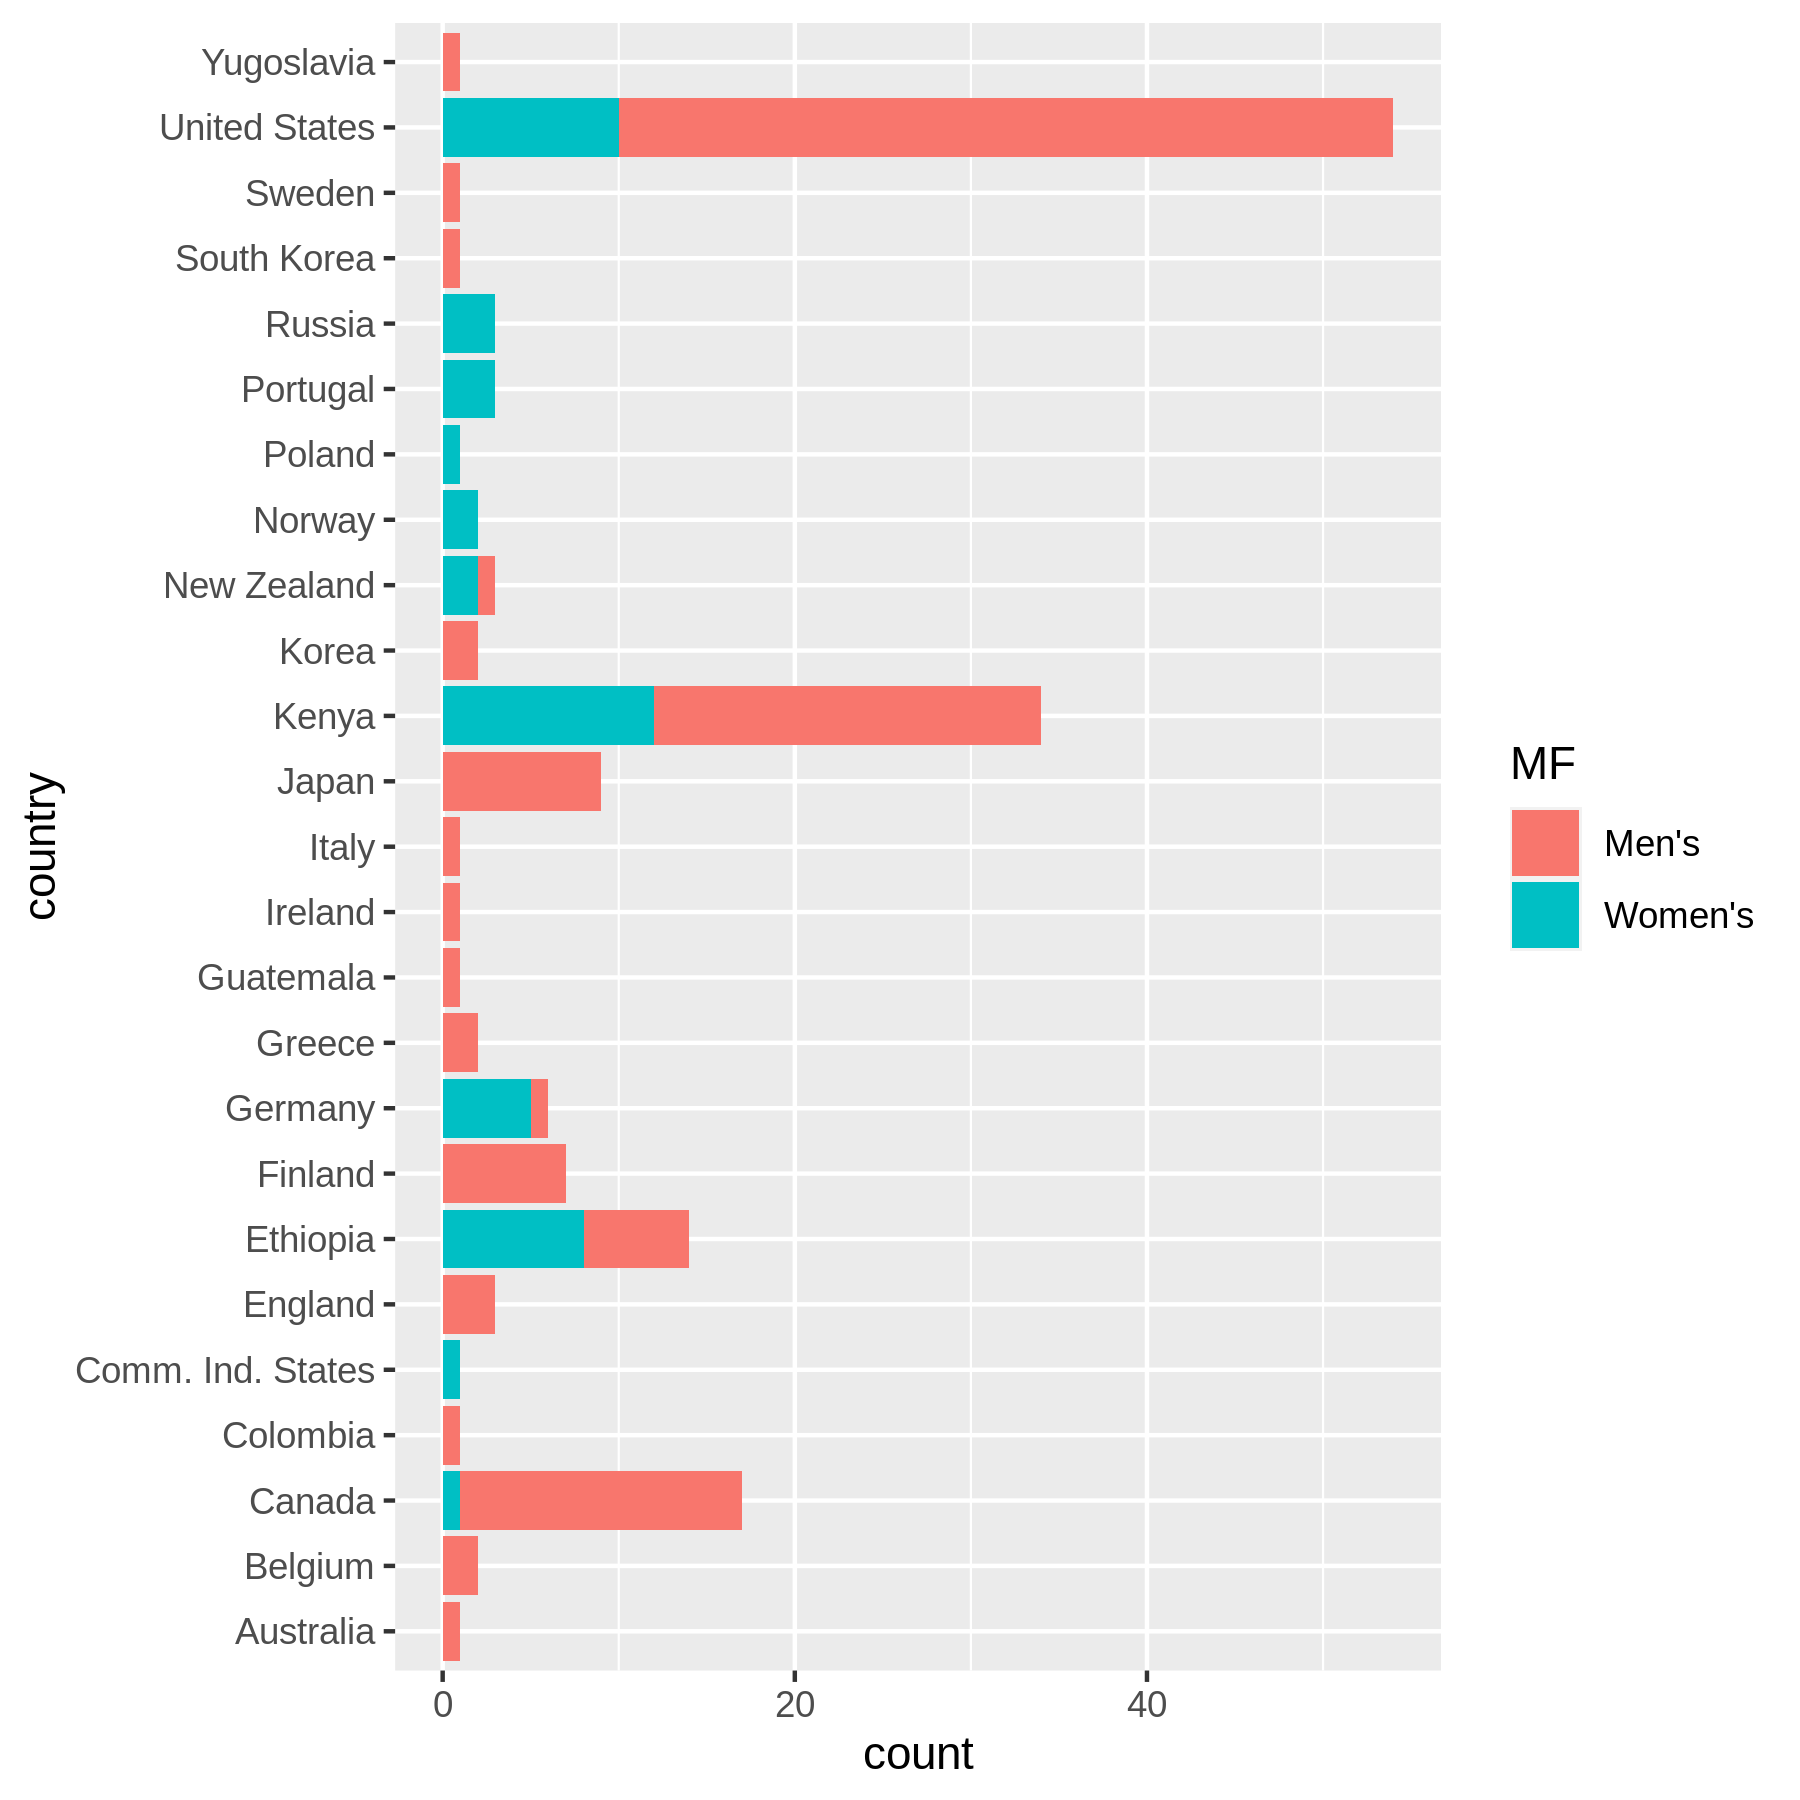

In [31]:
filtedat<-df.marathon%>% filter(year==2018)
q=ggplot(df.marathon, aes(y=country, fill=MF))
q=q+geom_bar()
q

Code your version of the chart below.

In [61]:
df<-df.marathon %>%
    filter(country %in% c("United States", "Kenya", "Japan","Ethiopia"))%>%
    group_by(country, MF)%>%
    summarize(race.time=mean(race.time), year= mean(year))
df %>% head

filtdat<- df.marathon %>% filter (year==2018)

df.adj<-df.marathon%>%
        filter(country %in% c("United States", "Kenya", "Japan","Ethiopia"))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



country,MF,race.time,year
<chr>,<chr>,<dbl>,<dbl>
Ethiopia,Men's,2.172083,2007.833
Ethiopia,Women's,2.411597,2007.625
Japan,Men's,2.277315,1971.667
Kenya,Men's,2.151086,2001.909
Kenya,Women's,2.422199,2007.917
United States,Men's,2.474678,1935.091


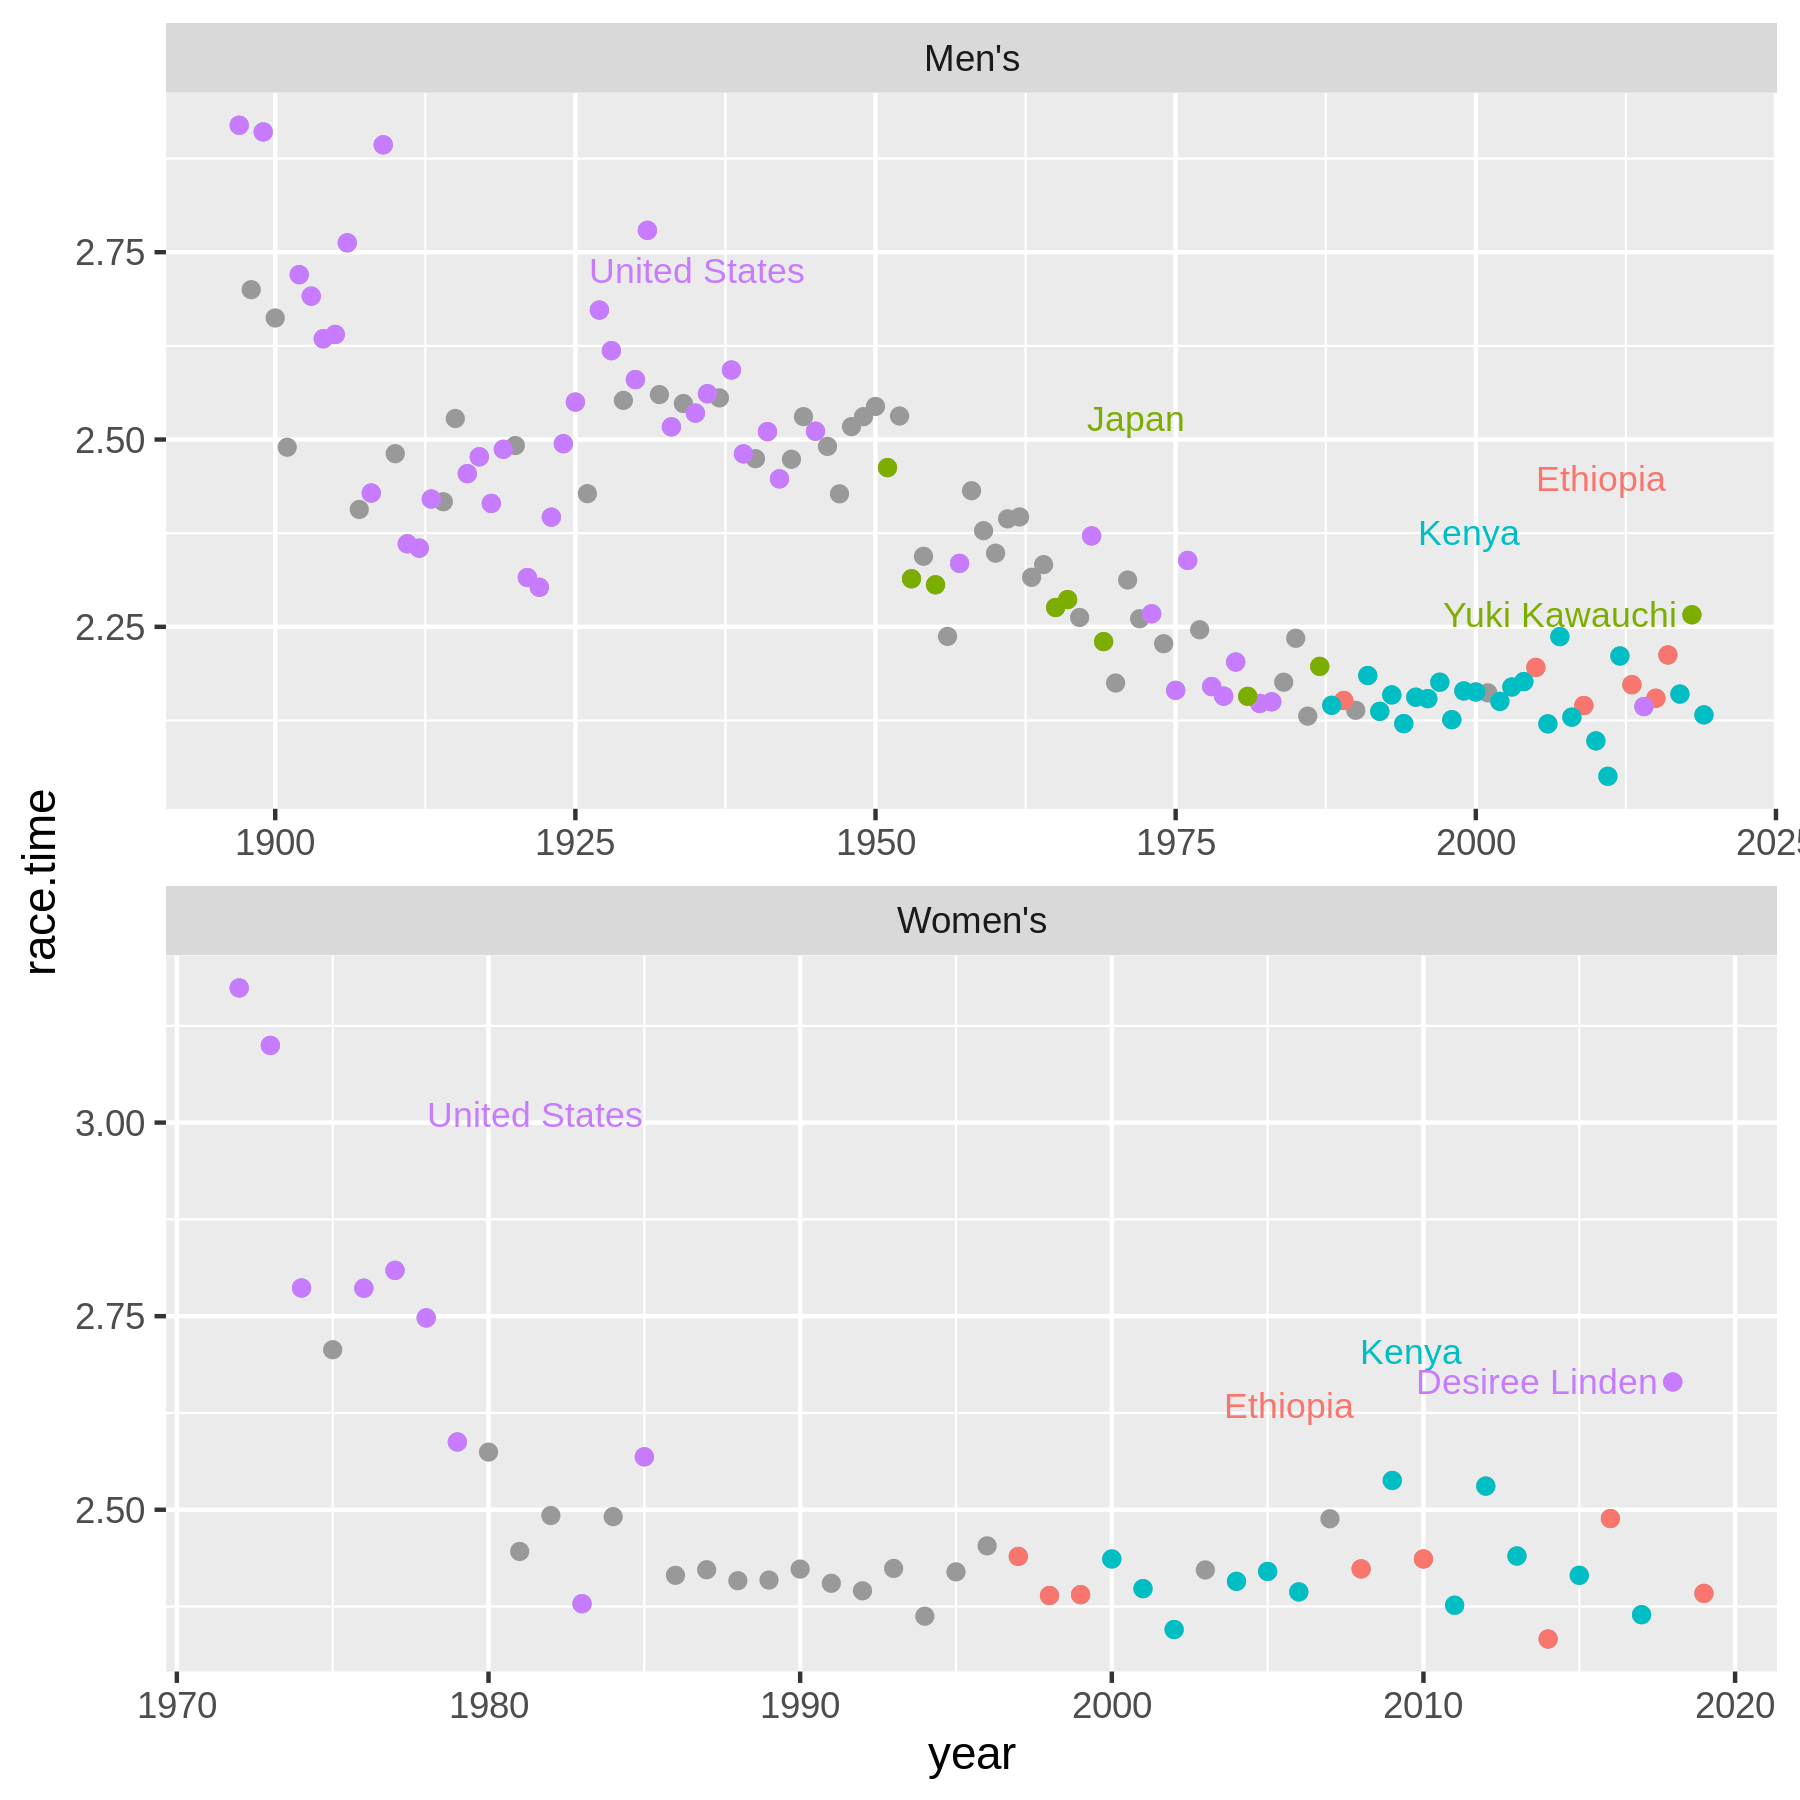

In [76]:
p=ggplot(df.marathon, aes(x=year, y=race.time))
p=p+geom_point(color='gray60')
p=p+geom_point(data= df.adj, aes(color=country))
p=p+facet_wrap(~MF, ncol=1, scales= 'free') #+theme(legend.text(element))
p=p + geom_text_repel(
        data=df, 
        nudge_y = .25,
        segment.size = 0,
        size = 3,
        aes(label=country,color=country))
p=p + geom_text_repel(
        data=filtdat, 
        segment.size = 0.1,
        size = 3,
        segment.color = "grey50",
        aes(label=name, color=country))
p=p+theme(legend.position='none')
p

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)